In [1]:
import xarray as xr
import pandas as pd

In [2]:
from osgeo import gdal

In [3]:
import numpy as np

## Import high-resolution crop yield data for 2000, 2010; select a crop

In [4]:
wheat_2000 = gdal.Open('crop_yields/2000/spam2000V3r107_global_Y_WHEA_A.tif').ReadAsArray()

In [5]:
test = gdal.Open('crop_yields/2000/spam2000V3r107_global_Y_WHEA_A.tif')

In [6]:
wheat_2000

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [7]:
wheat_2000_df = pd.DataFrame(wheat_2000)
wheat_2000_df

,0,1,2,3,4,5,6,7,8,9,...,4310,4311,4312,4313,4314,4315,4316,4317,4318,4319
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2156,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2157,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [8]:
# for some reason all the areas with zero yield are = -1 ?
wheat_2000_df[wheat_2000_df < 0] = 0

In [9]:
wheat_2000_df.shape

(2160, 4320)

In [10]:
wheat_2010 = gdal.Open('crop_yields/2010/spam2010V1r1_global_Y_WHEA_A.tif').ReadAsArray()

In [11]:
wheat_2010_df = pd.DataFrame(wheat_2010)
#wheat_2010_df

In [12]:
wheat_2010_df[wheat_2010_df < 0] = 0

In [13]:
wheat_2010_df.shape

(2160, 4320)

## Visualize crop datasets

In [14]:
import matplotlib.pyplot as plt

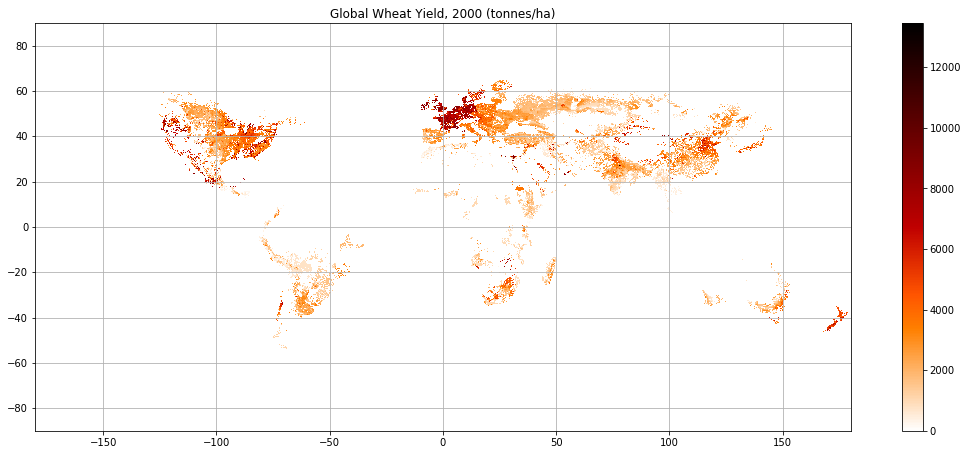

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
ax.set_title('Global Wheat Yield, 2000 (tonnes/ha)')
wheat_yield_plot = ax.imshow(wheat_2000_df, cmap='gist_heat_r', extent=[-180, 180, -90, 90])
cbar = fig.colorbar(wheat_yield_plot)
ax.grid(True)

plt.show()

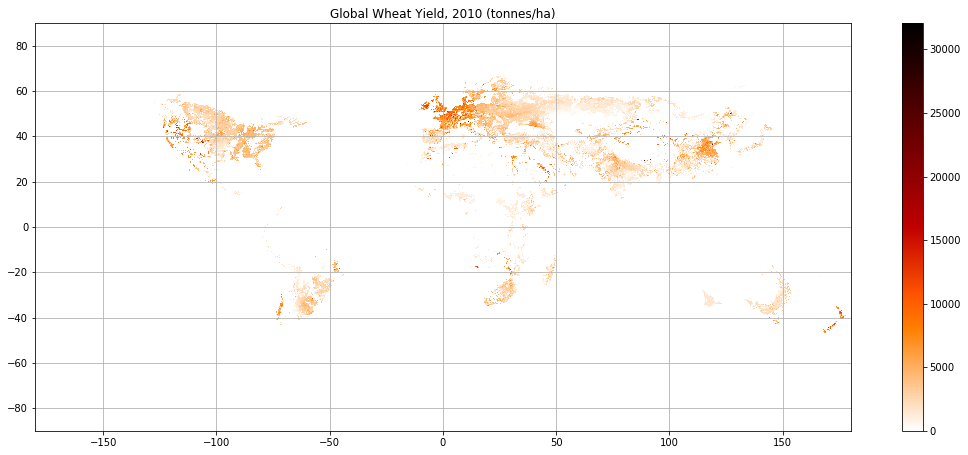

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
ax.set_title('Global Wheat Yield, 2010 (tonnes/ha)')
wheat_yield_plot = ax.imshow(wheat_2010_df, cmap='gist_heat_r', extent=[-180, 180, -90, 90])
cbar = fig.colorbar(wheat_yield_plot)
ax.grid(True)

plt.show()

In [17]:
# need to look more closely at the dataset info - not sure if this is like for like?
# (what are the different wheat data files?)

## getting crop yield arrays into correct format

In [18]:
import rasterio
from affine import Affine
from pyproj import Proj, transform

In [19]:
# routine to assign a latitude and longitude to every pixel

with rasterio.open('crop_yields/2000/spam2000V3r107_global_Y_WHEA_A.tif') as r:
    T0 = r.transform  # upper-left pixel corner affine transform
    p1 = Proj(r.crs)
    A = r.read()  # pixel values
    print(A.shape)

# All rows and columns
cols, rows = np.meshgrid(np.arange(A.shape[2]), np.arange(A.shape[1]))

# Get affine transform for pixel centres
T1 = T0 * Affine.translation(0.5, 0.5)
# Function to convert pixel row/column index (from 0) to easting/northing at centre
rc2en = lambda r, c: (c, r) * T1

# All eastings and northings (there is probably a faster way to do this)
eastings, northings = np.vectorize(rc2en, otypes=[np.float, np.float])(rows, cols)

# Project all longitudes, latitudes
p2 = Proj(proj='latlong',datum='WGS84')
longs, lats = transform(p1, p2, eastings, northings)

(1, 2160, 4320)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Right multiplication will be prohibited in version 3.0
  from ipykernel import kernelapp as app


In [20]:
x_longs = longs[0]
y_lats = lats[:,0]
print(x_longs,y_lats)

[-179.9583335 -179.8750005 -179.7916675 ...  179.7902275  179.8735605
  179.9568935] [ 89.9583335  89.8750005  89.7916675 ... -89.7909475 -89.8742805
 -89.9576135]


In [21]:
wheat_2000_df.index = y_lats
wheat_2000_df.columns = x_longs
#wheat_2000_df

In [22]:
wheat_2000_df = wheat_2000_df.stack().reset_index()

In [23]:
wheat_2000_df.columns = ['lat','lon','2000_yield']

In [24]:
# go from image array to indexed by lat/lon

#wheat_2000_df = wheat_2000_df.stack().reset_index()
#wheat_2000_df.columns = ['lat','lon', '2000_yield']
#wheat_2000_df

In [25]:
# not sure if correct :/ (directly mapping pixel values to lat/lon)

#crop_lons = np.linspace(-180,180,4320)
#crop_lats = np.linspace(-90,90,2160)

#lons_dict = dict(zip(range(0,4320),crop_lons))
#lats_dict = dict(zip(range(0,2160),crop_lats))

In [26]:
#wheat_2000_df['lat'] = wheat_2000_df['lat'].map(lats_dict)
#wheat_2000_df['lon'] = wheat_2000_df['lon'].map(lons_dict)
#wheat_2000_df

In [27]:
#wheat_2010_df = wheat_2010_df.stack().reset_index()
#wheat_2010_df.columns = ['lat','lon', '2010_yield']
#wheat_2010_df

In [28]:
#wheat_2010_df['lat'] = wheat_2010_df['lat'].map(lats_dict)
#wheat_2010_df['lon'] = wheat_2010_df['lon'].map(lons_dict)
#wheat_2010_df

In [29]:
wheat_2010_df.index = y_lats
wheat_2010_df.columns = x_longs

In [30]:
wheat_2010_df = wheat_2010_df.stack().reset_index()
wheat_2010_df.columns = ['lat','lon','2010_yield']

In [31]:
wheat_2010_df['historical_yield']= wheat_2000_df['2000_yield']
wheat_2010_df

,lat,lon,2010_yield,historical_yield
0,89.958333,-179.958334,0.0,0.0
1,89.958333,-179.875000,0.0,0.0
2,89.958333,-179.791668,0.0,0.0
3,89.958333,-179.708335,0.0,0.0
4,89.958333,-179.625001,0.0,0.0
...,...,...,...,...
9331195,-89.957614,179.623562,0.0,0.0
9331196,-89.957614,179.706895,0.0,0.0
9331197,-89.957614,179.790227,0.0,0.0
9331198,-89.957614,179.873561,0.0,0.0


## Train/test split

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [33]:
wheat_2010_df

,lat,lon,2010_yield,historical_yield
0,89.958333,-179.958334,0.0,0.0
1,89.958333,-179.875000,0.0,0.0
2,89.958333,-179.791668,0.0,0.0
3,89.958333,-179.708335,0.0,0.0
4,89.958333,-179.625001,0.0,0.0
...,...,...,...,...
9331195,-89.957614,179.623562,0.0,0.0
9331196,-89.957614,179.706895,0.0,0.0
9331197,-89.957614,179.790227,0.0,0.0
9331198,-89.957614,179.873561,0.0,0.0


In [34]:
# Divide into stratified validation and training data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wheat_2010_df, wheat_2010_df['lat'],wheat_2010_df['lon']):
    train_df = wheat_2010_df.loc[train_index]
    test_df = wheat_2010_df.loc[test_index]

## Random Forest using *only* historical yields (with lon/lat info)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
train_df = train_df[train_df['2010_yield'] != 0.0] # dropping rows where 2010 yield is zero
test_df = test_df[test_df["2010_yield"] != 0.0]

In [37]:
X_train = train_df.copy().drop(["2010_yield"],axis=1)
Y_train = train_df.copy()["2010_yield"]
X_test = test_df.copy().drop(["2010_yield"],axis=1)
Y_test = test_df.copy()["2010_yield"]

X_column_names = X_train.columns.values.tolist()

In [96]:
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1,oob_score=True)
rnd_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [97]:
rnd_reg.score(X_train, Y_train) # score for training set

0.9658487309643183

In [98]:
rnd_reg.oob_score_ # out-of-bag score

0.7485931462027773

In [99]:
rnd_reg.score(X_test, Y_test)

0.748489615055687

## Random Forest using *only* historical yields (without lon/lat info)

In [39]:
X_train = X_train.copy().drop(["lat"],axis=1).drop(["lon"],axis=1)
X_test= X_test.copy().drop(["lat"],axis=1).drop(["lon"],axis=1)
X_column_names = X_train.columns.values.tolist()

In [40]:
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1,oob_score=True)
rnd_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [41]:
rnd_reg.score(X_train, Y_train) # score for training set

0.4920353577368891

In [42]:
rnd_reg.oob_score_ # out-of-bag score

0.29898721731950717

In [43]:
rnd_reg.score(X_test, Y_test)

# historical yield only

0.29295983105375056

## Import ERA-Interim agroclimatic indicators and select the years 2000, 2010

In [44]:
dry = xr.open_dataset("ac_indicators/CDD_C3S-glob-agric_WFDEI_hist_season_19810101-20101231_v1.nc")

In [45]:
dry

<xarray.Dataset>
Dimensions:      (bounds: 2, lat: 360, lon: 720, time: 119)
Coordinates:
  * time         (time) datetime64[ns] 1981-04-16 1981-07-16 ... 2010-10-16
  * lat          (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: bounds
Data variables:
    time_bounds  (time, bounds) datetime64[ns] ...
    CDD          (time, lat, lon) float32 ...
Attributes:
    title:          CDD index from ECA drought indices
    institution:    Copernicus Climate Change Service
    comment:        
    history:         \n2019-04-26 12:53:02 Calculation of CDD indice (seasona...
    summary:        
    Conventions:    CF-1.7
    contact:        https://climate.copernicus.eu
    project:        C3S_422 Global Agriculture
    creation_date:  2019-04-26T12:53:02GMT
    lineage:        
    keywords:       
    license:        
    references:     Tank, A.K., 2010. European Climate Assessment and Dataset...
    source:         The WFDEI meteorological forcing data set: WATCH Forcing ...

In [46]:
CDD_winter = (dry.CDD).sel(time = '2010-01-16T00:00:00.000000000')
CDD_spring = (dry.CDD).sel(time = '2010-04-16T00:00:00.000000000')
CDD_summer = (dry.CDD).sel(time = '2010-07-16T00:00:00.000000000')
CDD_autumn = (dry.CDD).sel(time = '2010-10-16T00:00:00.000000000')
CDD_sum_2010 = CDD_winter + CDD_spring + CDD_summer + CDD_autumn
CDD_sum_2010

<xarray.DataArray 'CDD' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8

In [47]:
wet = xr.open_dataset("ac_indicators/CWD_C3S-glob-agric_WFDEI_hist_season_19810101-20101231_v1.nc")
wet

<xarray.Dataset>
Dimensions:      (bounds: 2, lat: 360, lon: 720, time: 119)
Coordinates:
  * time         (time) datetime64[ns] 1981-04-16 1981-07-16 ... 2010-10-16
  * lat          (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: bounds
Data variables:
    time_bounds  (time, bounds) datetime64[ns] ...
    CWD          (time, lat, lon) float32 ...
Attributes:
    title:          CWD index from ECA rain indices
    institution:    Copernicus Climate Change Service
    comment:        
    history:         \n2019-04-26 12:57:59 Calculation of CWD indice (seasona...
    summary:        
    Conventions:    CF-1.7
    contact:        https://climate.copernicus.eu
    project:        C3S_422 Global Agriculture
    creation_date:  2019-04-26T12:57:59GMT
    lineage:        
    keywords:       
    license:        
    references:     Tank, A.K., 2010. European Climate Assessment and Dataset...
    source:         The WFDEI meteorological forcing data set: WATCH Forcing ...

In [48]:
CWD_winter = (wet.CWD).sel(time = '2010-01-16T00:00:00.000000000')
CWD_spring = (wet.CWD).sel(time = '2010-04-16T00:00:00.000000000')
CWD_summer = (wet.CWD).sel(time = '2010-07-16T00:00:00.000000000')
CWD_autumn = (wet.CWD).sel(time = '2010-10-16T00:00:00.000000000')
CWD_sum_2010 = CWD_winter + CWD_spring + CWD_summer + CWD_autumn
CWD_sum_2010

<xarray.DataArray 'CWD' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8

In [49]:
frost = xr.open_dataset("ac_indicators/CFD_C3S-glob-agric_WFDEI_hist_season_19810101-20101231_v1.nc")
frost

<xarray.Dataset>
Dimensions:      (bounds: 2, lat: 360, lon: 720, time: 119)
Coordinates:
  * time         (time) datetime64[ns] 1981-04-16 1981-07-16 ... 2010-10-16
  * lat          (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: bounds
Data variables:
    time_bounds  (time, bounds) datetime64[ns] ...
    CFD          (time, lat, lon) float32 ...
Attributes:
    title:          CFD index from ECA cold indices
    institution:    Copernicus Climate Change Service
    comment:        
    history:         \n2019-04-26 12:53:15 Calculation of CFD indice (seasona...
    summary:        
    Conventions:    CF-1.7
    contact:        https://climate.copernicus.eu
    project:        C3S_422 Global Agriculture
    creation_date:  2019-04-26T12:53:15GMT
    lineage:        
    keywords:       
    license:        
    references:     Tank, A.K., 2010. European Climate Assessment and Dataset...
    source:         The WFDEI meteorological forcing data set: WATCH Forcing ...

In [50]:
CFD_winter = (frost.CFD).sel(time = '2010-01-16T00:00:00.000000000')
CFD_spring = (frost.CFD).sel(time = '2010-04-16T00:00:00.000000000')
CFD_summer = (frost.CFD).sel(time = '2010-07-16T00:00:00.000000000')
CFD_autumn = (frost.CFD).sel(time = '2010-10-16T00:00:00.000000000')
CFD_sum_2010 = CFD_winter + CFD_spring + CFD_summer + CFD_autumn
CFD_sum_2010

<xarray.DataArray 'CFD' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8

## Resample agroclimatic indicators datasets on scale of yield datasets by interpolation

In [51]:
# resampling
lons_new = np.linspace(-180, 180, 4320)
lats_new = np.linspace(-90, 90, 2160)
CWD = CWD_sum_2010.interp(coords={'lat':lats_new, 'lon':lons_new}, method='nearest').to_dataframe()
CFD = CFD_sum_2010.interp(coords={'lat':lats_new, 'lon':lons_new}, method='nearest').to_dataframe()
CDD = CDD_sum_2010.interp(coords={'lat':lats_new, 'lon':lons_new}, method='nearest').to_dataframe()

In [56]:
wheat_2010_df

,lat,lon,2010_yield,historical_yield
0,89.958333,-179.958334,0.0,0.0
1,89.958333,-179.875000,0.0,0.0
2,89.958333,-179.791668,0.0,0.0
3,89.958333,-179.708335,0.0,0.0
4,89.958333,-179.625001,0.0,0.0
...,...,...,...,...
9331195,-89.957614,179.623562,0.0,0.0
9331196,-89.957614,179.706895,0.0,0.0
9331197,-89.957614,179.790227,0.0,0.0
9331198,-89.957614,179.873561,0.0,0.0


In [90]:
#wheat_2010_df.index

In [89]:
#CWD.reset_index()['CWD']

In [88]:
#CWD.reset_index()

In [71]:
wheat_2010_df['CWD']=CWD.reset_index()['CWD']
wheat_2010_df['CFD']=CFD.reset_index()['CFD']
wheat_2010_df['CDD']=CDD.reset_index()['CDD']

wheat_2010_df

,lat,lon,2010_yield,historical_yield,CWD,CFD,CDD
0,89.958333,-179.958334,0.0,0.0,NaN,NaN,NaN
1,89.958333,-179.875000,0.0,0.0,NaN,NaN,NaN
2,89.958333,-179.791668,0.0,0.0,NaN,NaN,NaN
3,89.958333,-179.708335,0.0,0.0,NaN,NaN,NaN
4,89.958333,-179.625001,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9331195,-89.957614,179.623562,0.0,0.0,NaN,NaN,NaN
9331196,-89.957614,179.706895,0.0,0.0,NaN,NaN,NaN
9331197,-89.957614,179.790227,0.0,0.0,NaN,NaN,NaN
9331198,-89.957614,179.873561,0.0,0.0,NaN,NaN,NaN


In [72]:
#wheat_2010_aci = pd.concat([wheat_2010_df,CWD,CDD,CFD],axis=1)
#wheat_2010_aci

In [74]:
wheat_2010_aci = wheat_2010_df.dropna()

In [75]:
wheat_2010_aci_final=wheat_2010_aci.reset_index()
wheat_2010_aci_final

,index,lat,lon,2010_yield,historical_yield,CWD,CFD,CDD
0,1763898,55.958469,-68.458780,0.0,0.0,49.0,16.0,21.0
1,1763899,55.958469,-68.375447,0.0,0.0,49.0,16.0,21.0
2,1763900,55.958469,-68.292113,0.0,0.0,49.0,16.0,21.0
3,1763901,55.958469,-68.208781,0.0,0.0,49.0,16.0,21.0
4,1763902,55.958469,-68.125448,0.0,0.0,49.0,16.0,21.0
...,...,...,...,...,...,...,...,...
2426611,9017653,-83.957638,-28.875605,0.0,0.0,3.0,282.0,292.0
2426612,9017654,-83.957638,-28.792271,0.0,0.0,3.0,282.0,292.0
2426613,9017655,-83.957638,-28.708938,0.0,0.0,3.0,282.0,292.0
2426614,9017656,-83.957638,-28.625606,0.0,0.0,3.0,282.0,292.0


## Train a random forest to predict 2010 yields based on 2000 yields + 2010 agroclimatic indicators *with* lat/lon

In [76]:
# train/test split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wheat_2010_aci_final, wheat_2010_aci_final['lat'],wheat_2010_aci_final['lon']):
    train_df = wheat_2010_aci_final.loc[train_index]
    test_df = wheat_2010_aci_final.loc[test_index]

In [77]:
train_df = train_df[train_df['2010_yield'] != 0.0] # dropping rows where 2010 yield is zero
test_df = test_df[test_df["2010_yield"] != 0.0]

In [78]:
X_train = train_df.copy().drop(["2010_yield"],axis=1)
Y_train = train_df.copy()["2010_yield"]
X_test = test_df.copy().drop(["2010_yield"],axis=1)
Y_test = test_df.copy()["2010_yield"]

X_column_names = X_train.columns.values.tolist()

In [79]:
rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1,oob_score=True)
rnd_reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [80]:
rnd_reg.score(X_train, Y_train) # score for training set

0.9726912518973625

In [81]:
rnd_reg.oob_score_ # out-of-bag score

0.7974365774004056

In [82]:
rnd_reg.score(X_test, Y_test)

0.8065762453477304

#### Train a random forest regressor to predict 2010 yields based on 2000 yields + 2010 agroclimatic indicators *without* lat/lon

In [91]:
#X_train = X_train.copy().drop(["lat"],axis=1).drop(["lon"],axis=1)
#X_test= X_test.copy().drop(["lat"],axis=1).drop(["lon"],axis=1)
#X_column_names = X_train.columns.values.tolist()

In [92]:
#rnd_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1,oob_score=True)
#rnd_reg.fit(X_train, Y_train)

In [93]:
#rnd_reg.score(X_train, Y_train) # score for training set

In [94]:
#rnd_reg.oob_score_ # out-of-bag score

In [95]:
#rnd_reg.score(X_test, Y_test)

# RESULTS #

## historical yield only ##

0.305

0.293 (coordinate method update)

## historical yield + lat/lon ##

0.808

0.748 (coordinate method update)


## historical yield + lat/lon + agroclimatic indicators ##

0.804

0.807 (coordinate method update)